1. Import Package & Data

In [ ]:
!pip install sastrawi


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
import nltk
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline
import Sastrawi
from Sastrawi.StopWordRemover. StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import plotly.graph_objects as go

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data_Mining/dataBubarkanDPR.csv", index_col = 0)
df.head()

2. Cleaning Data

In [ ]:
df = df[['created_at', 'full_text']]

In [ ]:
df.info()

In [ ]:
# Ubah semua nilai di kolom 'full_text' menjadi string dan huruf kecil (lowercase)
df['full_text'] = df['full_text'].astype(str).str.lower()

# Ganti semua nilai 'false' dengan NA (nilai kosong/null versi pandas)
df['full_text'] = df['full_text'].replace('false', pd.NA)

# Hapus baris yang kolom 'full_text'-nya kosong/NA
df = df.dropna(subset=['full_text'])

# Hapus baris yang masih memiliki nilai 'false' (jika ada yang belum terganti)
df = df[df['full_text'] != 'false']

In [ ]:
# Hapus baris yang memiliki nilai duplikat di kolom 'full_text'
df = df.drop_duplicates(subset=['full_text'])

In [ ]:
# Fungsi untuk membersihkan teks Twitter
def clean_twitter_text(text):
    # Hapus mention (@username)
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Hapus hashtag (#hashtag)
    text = re.sub(r'#\w+', '', text)
    # Hapus retweet (RT)
    text = re.sub(r'RT[\s]+', '', text)
    # Hapus link (http atau https)
    text = re.sub(r'https?://\S+', '', text)
    # Hapus karakter non-alfanumerik (selain huruf/angka)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text
# Terapkan fungsi ke kolom 'full_text'
df['full_text'] = df['full_text'].apply(clean_twitter_text)

3. Preprocesing

In [ ]:
# Normalisasi
norm = {'bnr ':' benar', 'yg ':' yang', 'thn ':' tahun', 'org ':' orang'}

def Normalisasi(str_text):
    # Looping setiap singkatan di dictionary norm
    for i in norm:
        # Ganti singkatan dengan bentuk lengkapnya
        str_text = str_text.replace(i, norm[i])
    return str_text

# Terapkan fungsi normalisasi ke setiap baris di kolom 'full_text'
df['full_text'] = df['full_text'].apply(lambda x: Normalisasi(x))
df

4. StopWords

In [59]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

# Tambahan stopwords custom
more_stop_words = ["di", "ke", "dan", "dengan"]

# Ambil stopwords bawaan Sastrawi
factory = StopWordRemoverFactory()
stop_words = factory.get_stop_words()

# Gabungkan stopwords bawaan + custom
stop_words.extend(more_stop_words)

# Buat dictionary baru
new_array = ArrayDictionary(stop_words)

# Buat stopword remover baru
stop_words_remover_new = StopWordRemover(new_array)

# Fungsi hapus stopwords
def stopword(str_text):
    return stop_words_remover_new.remove(str_text)

# Terapkan ke kolom DataFrame
df['full_text'] = df['full_text'].apply(lambda x: stopword(x))

# Tampilkan 5 data teratas
df.head()


,full_text
0,percaya ohooiii media ngomong gitu asli tetap ...
1,dpr wakil partai wakil penting partai kamuflas...
2,slot gacor hari rabu apel pagi bem si apel pag...
3,tetap kelompok usaha awas tetap ati ati waspad...
4,bubar paling tolol dunia


5. TokenSize

In [60]:
# Tokenize

# Pecah teks di kolom 'full_text' menjadi list kata (dipisahkan spasi)
Tokenized = df['full_text'].apply(lambda x: x.split())
# Tampilkan 5 hasil tokenisasi pertama
Tokenized.head()

,full_text
0,"[percaya, ohooiii, media, ngomong, gitu, asli,..."
1,"[dpr, wakil, partai, wakil, penting, partai, k..."
2,"[slot, gacor, hari, rabu, apel, pagi, bem, si,..."
3,"[tetap, kelompok, usaha, awas, tetap, ati, ati..."
4,"[bubar, paling, tolol, dunia]"


6. **Stemming**

Stemming adalah proses mengubah sebuah kata ke bentuk dasarnya (root word / kata dasar).
Jadi, imbuhan seperti awalan (me-, ber-, ke-, dll), sisipan, atau akhiran (-an, -kan, -i, dll) akan dihapus supaya kata kembali ke bentuk asalnya.

In [61]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi stemming
def stemming(text_cleaning):
    # Buat factory dan stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Pecah teks jadi kata
    words = text_cleaning.split()

    # List untuk simpan hasil stemming
    hasil = []

    # Loop setiap kata
    for a in words:
        dt = stemmer.stem(a)   # lakukan stemming
        hasil.append(dt)

    # Gabungkan hasil stemming jadi string
    d_clean = " ".join(hasil)
    print(d_clean)
    return d_clean

# Terapkan fungsi stemming ke Series
df['stemmed'] = df['full_text'].apply(stemming)

# Simpan hasil ke CSV
df[['stemmed']].to_csv('/content/drive/MyDrive/Data_Mining/hasilStemmingData.csv', index=False)
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Fungsi stemming
def stemming(text_cleaning):
    # Buat factory dan stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Pecah teks jadi kata
    words = text_cleaning.split()

    # List untuk simpan hasil stemming
    hasil = []

    # Loop setiap kata
    for a in words:
        dt = stemmer.stem(a)   # lakukan stemming
        hasil.append(dt)

    # Gabungkan hasil stemming jadi string
    d_clean = " ".join(hasil)
    print(d_clean)
    return d_clean

# Terapkan fungsi stemming ke Series
df['stemmed'] = df['full_text'].apply(stemming)

# Simpan hasil ke CSV
df[['stemmed']].to_csv('/content/drive/MyDrive/Data_Mining/hasilStemming.csv', index=False)


percaya ohooiii media ngomong gitu asli tetap jalan bubar dpr selamat uang rakyat
dpr wakil partai wakil penting partai kamuflase penting rakyat tdk punya empati rakyat dpr kumpul orang2 partai saling bahu bahu bahkan saling sikut penting partai bubar dpr rakyat tdk butuh
slot gacor hari rabu apel pagi bem si apel pagi hari senin desak bubar dpr rakyat demo adil adil adil ulang tragedi 98 langsung cobain situs gacor adil slot gacor
tetap kelompok usaha awas tetap ati ati waspada paksa ambil paksa jutidak ambil makanya berkelompokmasa banyak trus desak cabut cipta karya bubar dprsahkan ampas aset
bubar paling tolol dunia
bubar dpr
nah makin lihat jelas pemikiranpemikiran bagus arah baik semotidak narasinarasi konkret bawa demo sehingtidak tuntut jelas roadmap jelas baik kalau cuma slogan singkat bubar dpr semua jutidak bilang
bubar dprpenjarakan semua dalamnyabuang laut kidul
iya bang prabowo mlm hrs buat statement bubar dpr polisi mulai mundur uda mulai dekat gedung rakyat
demo nasiona

KeyboardInterrupt: 

In [63]:
import pandas as pd

# Baru load CSV
df = pd.read_csv("/content/drive/MyDrive/Data_Mining/hasilStemming.csv")
df.head()


,full_text
0,percaya ohooiii media ngomong gitu asli tetap ...
1,dpr wakil partai hanya wakil penting partai ka...
2,slot gacor hari rabu apel pagi bem si apel pag...
3,tetap kelompok usaha awas sekitar tetap ati at...
4,bubar paling tolol dunia


7. Labeling

In [66]:
import pandas as pd
from transformers import pipeline
from tqdm import tqdm

# Load data
df = pd.read_csv('/content/drive/MyDrive/Data_Mining/hasilStemming.csv')

# Cek nama kolom
print(df.columns)

# Load sentiment classifier
classifier = pipeline("sentiment-analysis", model="w11wo/indonesian-roberta-base-sentiment-classifier")

# Fungsi prediksi sentimen
def prediksi_sentimen(teks):
    hasil = classifier(teks)
    return hasil[0]['label']

# Terapkan ke kolom yang benar (misalnya 'comment')
tqdm.pandas()  # aktifkan progress bar
df['sentimen'] = df['full_text'].progress_apply(prediksi_sentimen)

# Simpan hasil
df.to_csv('/content/drive/MyDrive/Data_Mining/hasilSentimen.csv', index=False)

print(df.head())


Index(['full_text'], dtype='object')


Device set to use cpu
100%|██████████| 1989/1989 [05:16<00:00,  6.28it/s]

                                           full_text  sentimen
0  percaya ohooiii media ngomong gitu asli tetap ...  negative
1  dpr wakil partai hanya wakil penting partai ka...  negative
2  slot gacor hari rabu apel pagi bem si apel pag...   neutral
3  tetap kelompok usaha awas sekitar tetap ati at...  negative
4                           bubar paling tolol dunia  negative


In [67]:
sentimen_counts = df.sentimen.value_counts()
sentimen_counts

,count
sentimen,
negative,1097
neutral,794
positive,98


/tmp/ipython-input-1891154076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentimen', data=df, palette='Set1')


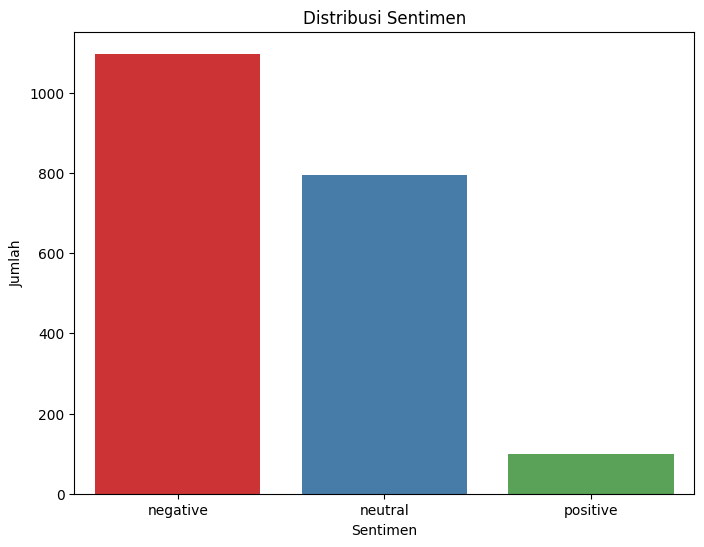

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentimen', data=df, palette='Set1')
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [69]:
df

,full_text,sentimen
0,percaya ohooiii media ngomong gitu asli tetap ...,negative
1,dpr wakil partai hanya wakil penting partai ka...,negative
2,slot gacor hari rabu apel pagi bem si apel pag...,neutral
3,tetap kelompok usaha awas sekitar tetap ati at...,negative
4,bubar paling tolol dunia,negative
...,...,...
1984,coba pecat duka kapolri dpr asbun kalau aja gi...,negative
1985,berapa hari demo ibu yth baru nongol ada korba...,negative
1986,banyak anggota dpr belagu sih jumawa asa diri ...,negative
1987,tai lah dialog2 udah bukan waktu dialog jabat ...,negative


**8. Training Data**

Training Data adalah bagian dari dataset yang digunakan untuk melatih model agar model dapat mempelajari pola, hubungan, atau aturan antara variabel independen (X) dan variabel dependen (Y).

In [70]:
x=df.full_text
y=df.sentimen

In [71]:
x_train, x_text, y_train, y_text = train_test_split(x,y, test_size=0.2, random_state=42)
#80 data dipakai sebagai training data → model belajar pola hubungan jam belajar dan nilai.
#20 data dipakai sebagai testing data → model diuji, apakah bisa memprediksi dengan baik.

In [72]:
cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()
#adalah teknik feature extraction untuk teks dari library scikit-learn. Fungsinya: mengubah data teks (kalimat, dokumen)
#menjadi vektor numerik supaya bisa diproses oleh algoritma machine learning.

9. Naive bayes

In [73]:
clf_nb = MultinomialNB()

model_nb = Pipeline([('vectorizer', tvec), ('classifier', clf_nb)])
model_nb.fit(x_train, y_train)
hasil_nb = model_nb.predict(x_text)

<function matplotlib.pyplot.show(close=None, block=None)>

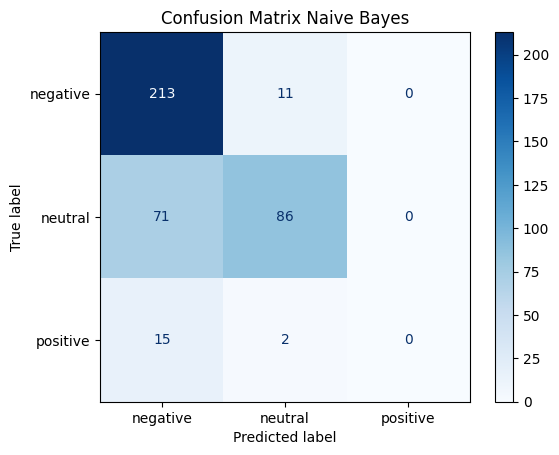

In [74]:
#confusion Matrix
cm = confusion_matrix(y_text, hasil_nb, labels=model_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_nb.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Naive Bayes')
plt.show

In [75]:
matrix=classification_report(y_text,hasil_nb)
print('Classification Report:\n',matrix)

Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.95      0.81       224
     neutral       0.87      0.55      0.67       157
    positive       0.00      0.00      0.00        17

    accuracy                           0.75       398
   macro avg       0.53      0.50      0.50       398
weighted avg       0.74      0.75      0.72       398



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


  10. SVM

  SVM itu singkatan dari Support Vector Machine, yaitu salah satu algoritma machine learning yang banyak digunakan untuk klasifikasi dan juga regresi (meskipun lebih populer di klasifikasi).

In [76]:
clf_svm = SVC()

model_svm = Pipeline([('vectorizer', tvec), ('classifier', clf_svm)])
model_svm.fit(x_train, y_train)
hasil_svm = model_svm.predict(x_text)


<function matplotlib.pyplot.show(close=None, block=None)>

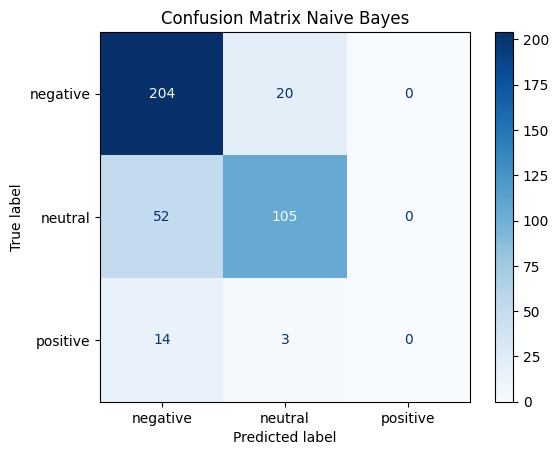

In [77]:
#confusion Matrix
cm = confusion_matrix(y_text, hasil_svm, labels=model_nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_nb.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Naive Bayes')
plt.show

In [78]:
matrix = classification_report(y_text, hasil_svm)
print('Classification Report:\n', matrix)

Classification Report:
               precision    recall  f1-score   support

    negative       0.76      0.91      0.83       224
     neutral       0.82      0.67      0.74       157
    positive       0.00      0.00      0.00        17

    accuracy                           0.78       398
   macro avg       0.53      0.53      0.52       398
weighted avg       0.75      0.78      0.76       398



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


11. Testing

In [79]:
!pip install pandas


In [80]:
import pandas as pd

# Baca dataset
df_test = pd.read_csv('/content/drive/MyDrive/Data_Mining/hasilStemming.csv')

# Cleaning data
df_test = df_test.drop_duplicates(subset=['full_text'])  # harus konsisten nama kolom
df_test = df_test.dropna()

# Prediksi dengan model NB dan SVM
df_test["pred_nb"] = model_nb.predict(df_test["full_text"])
df_test["pred_svm"] = model_svm.predict(df_test["full_text"])

# Tampilkan hasil
(df_test.head())


,full_text,pred_nb,pred_svm
0,percaya ohooiii media ngomong gitu asli tetap ...,negative,negative
1,dpr wakil partai hanya wakil penting partai ka...,negative,negative
2,slot gacor hari rabu apel pagi bem si apel pag...,neutral,neutral
3,tetap kelompok usaha awas sekitar tetap ati at...,negative,negative
4,bubar paling tolol dunia,negative,negative


In [81]:
import plotly.graph_objects as go

# Label dan warna
labels = ["negative", "neutral", "positive"]
color_map = {"negative": "red", "neutral": "blue", "positive": "green"}

# Hitung jumlah prediksi tiap model
counts_nb = df_test["pred_nb"].value_counts()
counts_svm = df_test["pred_svm"].value_counts()

# Buat figure
fig = go.Figure([
    go.Bar(
        name="Naive Bayes",
        x=labels,
        y=[counts_nb.get(lbl, 0) for lbl in labels],
        marker_color=[color_map[lbl] for lbl in labels]
    ),
    go.Bar(
        name="SVM",
        x=labels,
        y=[counts_svm.get(lbl, 0) for lbl in labels],
        marker_pattern_shape="/",
        marker_color=[color_map[lbl] for lbl in labels]
    )
])

# Tambahkan layout
fig.update_layout(
    barmode="group",
    title="Perbandingan Distribusi Prediksi Sentimen (NB vs SVM)",
    xaxis_title="Sentimen",
    yaxis_title="Jumlah",
    annotations=[
        # Teks untuk NB
        dict(x=lbl, y=v, text=str(v), showarrow=False, yshift=10, font=dict(color=color_map[lbl]))
        for lbl, v in zip(labels, [counts_nb.get(lbl, 0) for lbl in labels])
    ] + [
        # Teks untuk SVM
        dict(x=lbl, y=v, text=str(v), showarrow=False, yshift=10, font=dict(color=color_map[lbl]))
        for lbl, v in zip(labels, [counts_svm.get(lbl, 0) for lbl in labels])
    ]
)

fig.show()
